In [1]:
import sys
import os
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from typing import List

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.MCEstimator import TrackEndEstimator
%matplotlib widget

In [2]:
particleTracerK = pickle.load(open('data/particleTracerK.pkl', 'rb'))
particleTracerKD = pickle.load(open('data/particleTracerKD.pkl', 'rb'))
eSource, NB_PARTICLES, dS, sigmaArray = pickle.load(open('data/simargv.pkl', 'rb'))
nbSim = sigmaArray.size

In [3]:
print(eSource, NB_PARTICLES, dS, sigmaArray)

5.0 2000000 1.0 [1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]


In [4]:
# Load all simulation results from data/

TEKDList: List[TrackEndEstimator] = []; TEKDSList: List[TrackEndEstimator] = []; TEAList: List[TrackEndEstimator] = []
for i in range(nbSim):
    TEKDList.append(pickle.load(open(f'data/TrackEndEstimatorKD{i}.pkl', 'rb'))[0])
    TEKDSList.append(pickle.load(open(f'data/TrackEndEstimatorKDS{i}.pkl', 'rb'))[0])
    TEAList.append(pickle.load(open(f'data/TrackEndEstimatorA{i}.pkl', 'rb'))[0])


In [9]:
# Compute wasserstein distance
bins = 200

Wass = np.empty((nbSim, 2), dtype=float)
for i in range(nbSim):
    _, aData = TEAList[i].getDensityData(bins=bins)
    _, kdData = TEKDList[i].getDensityData(bins=bins)
    _, kdsData = TEKDSList[i].getDensityData(bins=bins)
    Wass[i, 0] = stats.wasserstein_distance(aData, kdData)
    Wass[i, 1] = stats.wasserstein_distance(aData, kdsData)


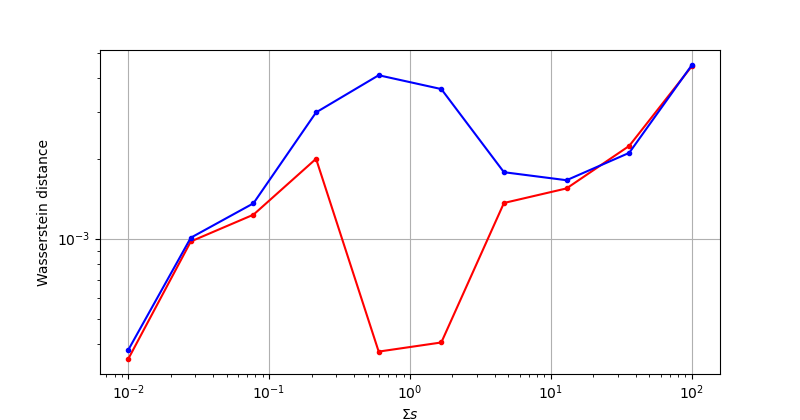

In [10]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.2))

ax1.loglog(sigmaArray, Wass[:, 0], '.-r', label='KDMC')
ax1.loglog(sigmaArray, Wass[:, 1], '.-b', label='KDSMC')
ax1.set_xlabel('$\Sigma s$')
ax1.set_ylabel('Wasserstein distance')
ax1.grid()

Text(0, 0.5, 'Density')

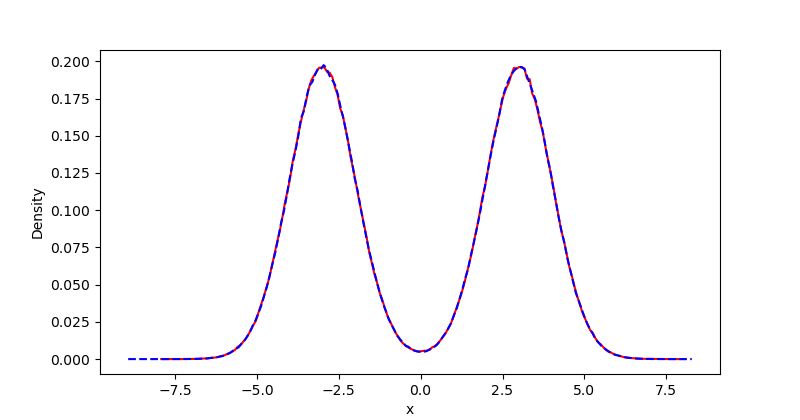

In [11]:
kd1Center, kd1Data = TEKDList[-1].getDensityData(bins=bins)
aCenter, aData = TEAList[-1].getDensityData(bins=bins)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.2))

ax1.plot(kd1Center, kd1Data, 'r', label='KDMC')
ax1.plot(aCenter, aData, '--b', label= 'Analog')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')

In [8]:
TEKDList[-1].scoreMatrix.size

2000000